Name: Write Your Name Here

In [204]:
#Jordan Fanapour

Submission:

1- Run all cells (this is important, the results will remain there for us to look)

2- Download .ipynb

3- Download .py

4- Use Save as or Print to create a PDF version of the notebook  

5- Create a directory named: firstname_lastname_lr (e.g. pedram_rooshenas_lr)

6- Put all three .ipynb, .py, and .pdf into the directory. (*** Don't forget the PDF and .py ***) 

7- Zip (don't use rar) and Submit on Gradescope

In [205]:
#Mounting Google Drive:
#After running this cell a popup window will appear and requesting to select your  Google account and give the access permission.
#You can either use your personal Google account or your UIC Google account.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [206]:
path="/content/gdrive/MyDrive/CS_412/Programming_2/"

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import re
import pandas as pd

Numpy is library for scientific computing in Python. It has efficient implementation of n-dimensional array (tensor) manupulations, which is useful for machine learning applications.

In [208]:
import numpy as np

We can convert a list into numpy array (tensor)  

In [209]:
b = [[1, 2, 4], [2, 6, 9]]
a = np.array(b)
a

array([[1, 2, 4],
       [2, 6, 9]])

We can check the dimensions of the array

In [210]:
a.shape

(2, 3)

We can apply simple arithmetic operation on all element of a tensor

In [211]:
a * 3

array([[ 3,  6, 12],
       [ 6, 18, 27]])

You can transpose a tensor
    

In [212]:
print(a.T.shape)
a.T

(3, 2)


array([[1, 2],
       [2, 6],
       [4, 9]])

You can apply aggregate functions on the whole tensor

In [213]:
np.sum(a)

24

or on one dimension of it

In [214]:
np.sum(a, axis=0)

array([ 3,  8, 13])

In [215]:
np.sum(a, axis=1)

array([ 7, 17])

We can do element-wise arithmetic operation on two tensors (of the same size)

In [216]:
c1 = np.array([[1, 2, 4], [2, 6, 9]])
c2 = np.array([[2, 3, 5], [1, 2, 1]])
c1 * c2

array([[ 2,  6, 20],
       [ 2, 12,  9]])

If you want to multiply all columns of a tensor by vector (for example if you want to multiply all data features by their lables) you need a trick. This multiplication shows up in calculating the gradients. 

In [217]:
a = np.array([[1, 2, 4], [2, 6, 9]])
b = np.array([1,-1])
print(a)
print(b)


[[1 2 4]
 [2 6 9]]
[ 1 -1]


Here we want to multiply the first row of a by 1 and the second row of a by -1. Simply multiplying a by b does not work because a and b do not have the same dimension

In [218]:
a * b

ValueError: ignored

To do this multiplication we first have to assume b has one column and then repeat the column of b with the number of columns in a. We use tile function to do that

In [219]:
b_repeat = np.tile(b,  (a.shape[1],1)).T
print(b_repeat.shape)
b_repeat

(2, 3)


array([[ 1,  1,  1],
       [-1, -1, -1]])

Now we can multiply each column of a by b:

In [220]:
a * b_repeat

array([[ 1,  2,  4],
       [-2, -6, -9]])

You can create inital random vector using numpy (using N(0,1)):

In [221]:
mu = 0 #mean
sigma = 1 #standard deviation
r = np.random.normal(mu,sigma, 1000) #draws 1000 samples from a normal distribution

We can apply functions on tensors

In [222]:
#implementation of Normal distribution
def normal(x, mu, sigma):
    return np.exp( -0.5 * ((x-mu)/sigma)**2)/np.sqrt(2.0*np.pi*sigma**2)

#probability of samples on the Normal distribution
probabilities = normal(r, mu, sigma)

Numpy has useful APIs for analysis. Here we plot the histogram of samples and also plot the probabilies to see if the samples follow the normal distribution.

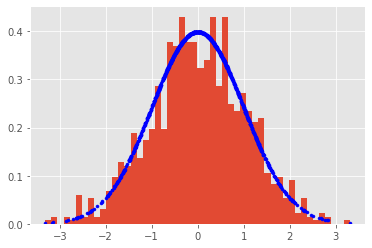

In [223]:
counts, bins = np.histogram(r,50,density=True)
plt.hist(bins[:-1], bins, weights=counts)
plt.scatter(r, probabilities, c='b', marker='.')

In [224]:
def read_data(filename):
    f = open(filename, 'r')
    p = re.compile(',')
    xdata = []
    ydata = []
    header = f.readline().strip()
    varnames = p.split(header)
    namehash = {}
    for l in f:
        li = p.split(l.strip())
        xdata.append([float(x) for x in li[:-1]])
        ydata.append(float(li[-1]))
    
    return np.array(xdata), np.array(ydata)


Assuming our data is x is available in numpy we use numpy to implement logistic regression


In [225]:
(xtrain_whole, ytrain_whole) = read_data(path + 'spambase-train.csv')
(xtest, ytest) = read_data(path + 'spambase-test.csv')

In [226]:
print("The shape of xtrain:", xtrain_whole.shape)
print("The shape of ytrain:", ytrain_whole.shape)
print("The shape of xtest:", xtest.shape)
print("The shape of ytest:", ytest.shape)

The shape of xtrain: (3601, 54)
The shape of ytrain: (3601,)
The shape of xtest: (1000, 54)
The shape of ytest: (1000,)


before training make we normalize the input data (features)

In [227]:
xmean = np.mean(xtrain_whole, axis=0)
xstd = np.std(xtrain_whole, axis=0)
xtrain_normal_whole = (xtrain_whole-xmean) / xstd
xtest_normal = (xtest-xmean) / xstd

We need to create a validation set. We create an array of indecies and permute it.

In [228]:
premute_indicies = np.random.permutation(np.arange(xtrain_whole.shape[0]))

We keep the first 2600 data points as the training data and rest as the validation data 

In [229]:
xtrain_normal = xtrain_normal_whole[premute_indicies[:2600]]
ytrain = ytrain_whole[premute_indicies[:2600]]
xval_normal = xtrain_normal_whole[premute_indicies[2600:]]
yval = ytrain_whole[premute_indicies[2600:]]

Initiallizing the weights and bias with random values from N(0,1)

In [230]:
weights = np.random.normal(0, 1, xtrain_normal.shape[1]);
bias = np.random.normal(0,1,1)

In [231]:
#the sigmoid function
def sigmoid(v):
    #return np.exp(-np.logaddexp(0, -v)) #numerically stable implementation of sigmoid function 
    return 1.0 / (1+np.exp(-v))

We can use dot-product from numpy to calculate the margin and pass it to the sigmoid function

In [232]:
#w: weight vector (numpy array of size n)
#b: numpy array of size 1
#returns p(y=1|x, w, b)
def prob(x, w, b):
    return sigmoid(np.dot(x,w) + b);

You can also calculate $l_2$ penalty using linalg library of numpy 

In [233]:
np.linalg.norm(weights)

6.429579320921634

$$\text{Cross Entropy Loss} = -\frac{1}{|D|}[\sum_{(y^i,\mathbf{x}^i)\in\mathcal{D}} 
 y^i \log p(y=1|\mathbf{x}^i;\mathbf{w},b)  +  (1-y^i) \log (1 - p(y=1|\mathbf{x}^i;\mathbf{w},b))]+\frac{\lambda}{2} \|\mathbf{w}\|^2 $$

In [234]:
#w: weight vector (numpy array of size n)
#x: training data points (only attributes)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns the cross entropy loss
def loss(w, x, y_prob, y_true, lambda_):
    regularizer = (lambda_*((np.linalg.norm(w))**2))/2    # Calculate regularizer (λ2∥w∥2)
    theta = y_true*np.log(y_prob)                       # Calculate yi*log(p(y=1|xi;w,b))
    oneMinusTheta = (1-y_true)*np.log(1-y_prob)         # Calculate (1−yi)*log(1−p(y=1|xi;w,b))
    sum = np.sum(theta + oneMinusTheta)                 # Calculate sum
    return ((-1*sum)/y_prob.shape[0]) + regularizer     # return
    

In [235]:
#x: input variables (data of size m x n with m data point and n features)
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns tuple of gradient w.r.t w and w.r.t to bias

def grad_w_b(x, w, y_prob, y_true, lambda_):
    expYPred = (1/y_prob) - 1                                                  # Equivalent to exp(-(w*x+b))
    deriOfTheta = y_true*y_prob*expYPred                                       # derivative of yi*log(p(y=1|xi;w,b))
    deriOfOneMinusTheta = -1*(1-y_true)*y_prob                                 # derivative of (1−yi)*log(1−p(y=1|xi;w,b))
    theta_repeat = np.tile(deriOfTheta,  (x.shape[1],1)).T
    oneMinusTheta_repeat = np.tile(deriOfOneMinusTheta, (x.shape[1],1)).T
    grad_w = (-1*np.sum(x*(theta_repeat + oneMinusTheta_repeat), axis=0))/y_prob.shape[0] + lambda_*w
    grad_b = (-1*np.sum(deriOfTheta + deriOfOneMinusTheta))/y_prob.shape[0]

    return (grad_w,grad_b)

In [236]:

#lambda_ is the coeffienct of l2 norm penalty
#learning_rate is learning rate of gradient descent algorithm
#max_iter determines the maximum number of iterations if the gradients descent does not converge.
#continue the training while gradient > 0.1 or the number steps is less max_iter

#returns model as tuple of (weights,bias)

def fit(x, y_true, learning_rate, lambda_, max_iter, verbose=0):
    weights = np.random.normal(0, 1, x.shape[1]);
    bias = np.random.normal(0,1,1)
    #change the condition appropriately
    iter = 1
    grad_norm = np.inf
    while iter < max_iter and grad_norm > 0.01:
        y_prob = prob(x, weights, bias)
        (grad_weight, grad_b) = grad_w_b(x, weights, y_prob, y_true, lambda_)
        if verbose: #verbose is used for debugging purposes
            #print iteration number, loss, l2 norm of gradients, l2 norm of weights
            print("Iteration #" + str(iter) + "  Loss: " + str(loss(weights, x, y_prob, y_true, lambda_)) + "; l2 norm of gradients: " + str(np.linalg.norm(grad_weight)) + "; l2 norm of weights: " + str(np.linalg.norm(weights)))
        # Update weights and bias
        weights = weights - learning_rate*grad_weight
        bias = bias - learning_rate*grad_b
        iter += 1
        grad_norm = np.linalg.norm(grad_weight)
    return (weights, bias)

In [237]:
def accuracy(x, y_true, model):
    w, b = model
    return np.sum((prob(x, w, b)>0.5).astype(np.float) == y_true)  / y_true.shape[0]

In [238]:
learning_rate = 0.001
lambda_ = 1.0

model = fit(xtrain_normal, ytrain, learning_rate, lambda_, 10000, verbose=1) #keep the verbose on here for your submissions

Streaming output truncated to the last 5000 lines.
Iteration #1119  Loss: 2.6532871883457556; l2 norm of gradients: 2.1538267545784833; l2 norm of weights: 2.093214172624914
Iteration #1120  Loss: 2.64864917390042; l2 norm of gradients: 2.1515465243329492; l2 norm of weights: 2.0910952506191496
Iteration #1121  Loss: 2.6440209663233105; l2 norm of gradients: 2.149268539440445; l2 norm of weights: 2.0889786419831795
Iteration #1122  Loss: 2.639402545566997; l2 norm of gradients: 2.146992797896266; l2 norm of weights: 2.0868643445178563
Iteration #1123  Loss: 2.6347938916233526; l2 norm of gradients: 2.144719297697974; l2 norm of weights: 2.084752356026085
Iteration #1124  Loss: 2.6301949845234738; l2 norm of gradients: 2.142448036845394; l2 norm of weights: 2.0826426743128192
Iteration #1125  Loss: 2.625605804337613; l2 norm of gradients: 2.140179013340609; l2 norm of weights: 2.0805352971850626
Iteration #1126  Loss: 2.6210263311750928; l2 norm of gradients: 2.1379122251879528; l2 norm

In [239]:
print("Train accuracy: ", accuracy(xtrain_normal, ytrain, model))

Train accuracy:  0.8411538461538461


<ipython-input-237-c2c25048c40d>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.sum((prob(x, w, b)>0.5).astype(np.float) == y_true)  / y_true.shape[0]


In [240]:
#grid search for finding the best hyperparams and model

best_model = None
best_val = -1
for lr in [0.01, 0.001, 0.0001, 0.00001]:
    for la in [5, 2, 1, 0.1, 0.01]:
        model = fit(xtrain_normal, ytrain, lr, la, 10000, verbose=0)
        val_acc = accuracy(xval_normal, yval, model)
        print(lr, la, val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_model = model
    

<ipython-input-237-c2c25048c40d>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.sum((prob(x, w, b)>0.5).astype(np.float) == y_true)  / y_true.shape[0]


0.01 5 0.6763236763236763
0.01 2 0.8351648351648352
0.01 1 0.8791208791208791
0.01 0.1 0.913086913086913
0.01 0.01 0.9240759240759241
0.001 5 0.6163836163836164
0.001 2 0.8571428571428571
0.001 1 0.8741258741258742
0.001 0.1 0.8761238761238761
0.001 0.01 0.8141858141858141
0.0001 5 0.38461538461538464
0.0001 2 0.7122877122877123
0.0001 1 0.6813186813186813
0.0001 0.1 0.5994005994005994
0.0001 0.01 0.5794205794205795
1e-05 5 0.5024975024975025
1e-05 2 0.5374625374625375
1e-05 1 0.3436563436563437
1e-05 0.1 0.5054945054945055
1e-05 0.01 0.6813186813186813


In [241]:
print("Test accuracy: ", accuracy(xtest_normal, ytest, best_model))

Test accuracy:  0.94


<ipython-input-237-c2c25048c40d>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.sum((prob(x, w, b)>0.5).astype(np.float) == y_true)  / y_true.shape[0]
